# Analysis of Titanic survivor data

In [2]:
import numpy as np
import pandas as pd

In [3]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into panda dataframe for analysis

In [4]:
titanic_df = pd.read_csv("titanic_data.csv")

print titanic_df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Examine the dataframe to find the data type, columns with missing values and descriptive statistics 

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### The total number of observations is 891. There are three columns with missing value (Sex, Cabin and Embarked). To conserve the data quantity, the missing values are only removed when its correponding column is analyzed

# Fix data types. Convert "sex" data type to Boolean for easy manipulation 

In [7]:
# convert sex into booleans for easy manipulation and store values in 'gender'
titanic_df["Gender"]= titanic_df["Sex"] == "male"
titanic_df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Gender                            True
Name: 0, dtype: object

# Extract numeric data series for analysis

In [8]:
# extract numerical columns for analysis 
num_fields = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare","Gender"]
num_titanic_df = titanic_df[num_fields]
num_titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.47799
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,False
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,True


## During the tragedy, the number of life boat was way smaller than the total number of passengers and crew on board. The world was told that females and children were given priority to life boat. I am curious to confirm it with real data. In addition, the socio-economic class was likely to impact people's power to get to life boat as well. Therefore, with this dataset, I 'd like to ask the following specific questions. 
### 1. Does female have a higher survival rate than male?  
### 2. Does children under 10 have a higher survival rate than other age groups?
### 3. Is socio-economic status related to survival rate?

## Question 1. Does female have a higher survival rate than male?  

In [9]:
#group dataframe by gender
gender_groups = num_titanic_df.groupby("Gender")

gender_groups_survival_rate = gender_groups.mean()["Survived"]
print gender_groups_survival_rate

Gender
False    0.742038
True     0.188908
Name: Survived, dtype: float64


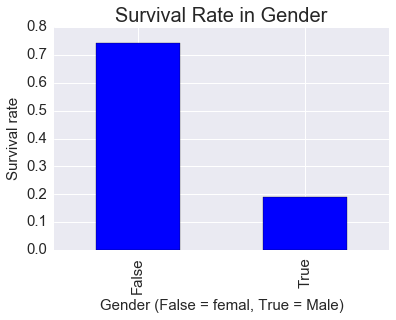

In [10]:
#print survival rate for gender
gender_groups_survival_rate.plot.bar(fontsize=15)
plt.title ("Survival Rate in Gender", fontsize=20)
plt.xlabel("Gender (False = femal, True = Male)", fontsize=15)
plt.ylabel("Survival rate", fontsize=15)  # survival rate is the ratio of survivors to total number in that group

### The above figure shows that female survival rate was more than three times higher than male.

## 2. Does children under 10 have a higher survival rate than other age groups? 

### Define a function to remove missing values

In [11]:
#from the above table we know that only "Age" column has missing values
#define a function to drop the NaN values in specific column when analyzing that column data
def dropna_column(dataframe, column):
    return dataframe.dropna(subset=[column])

### Remove the missing values. Create a new field to label each passenger if he or she is under 10 years old

In [12]:
# remove missing "Age" value rows
age_df = dropna_column(num_titanic_df, "Age")

# create two groups: one group is for age under 10, one group contains the rest of data
age_df["Age_under_10"] = (age_df["Age"]<=10)

print age_df.head()

   Survived  Pclass  Age  SibSp  Parch     Fare Gender Age_under_10
0         0       3   22      1      0   7.2500   True        False
1         1       1   38      1      0  71.2833  False        False
2         1       3   26      0      0   7.9250  False        False
3         1       1   35      1      0  53.1000  False        False
4         0       3   35      0      0   8.0500   True        False


C:\Users\Zhenning\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Examine the age distribution in survivors and non-survivors with histogram 

In [15]:
survival_groups = age_df.groupby("Survived")

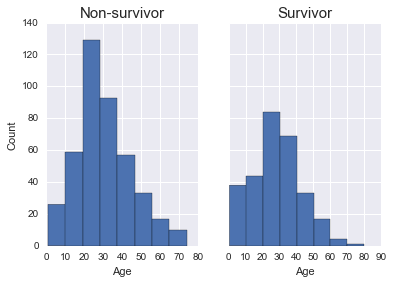

In [27]:
figure, (ax1, ax2) =plt.subplots(1, 2, sharey =True)
ax1= survival_groups.get_group(0)["Age"].hist(bins =8, ax=ax1)
ax1.set_title("Non-survivor", fontsize=15)
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

ax2= survival_groups.get_group(1)["Age"].hist(bins =8, ax=ax2)
ax2.set_title("Survivor", fontsize=15)
ax2.set_xlabel("Age")

### The age overall shape of age distribution of survivors is similar to that of non-survivors. However, it is noticeable that the survivor group has a higher portion of children under 10.
### Investigate the survival rate of age group under 10 and compare it to the rest of ages

In [28]:
age_groups = age_df.groupby("Age_under_10")

In [29]:
age_groups_survival_rate = age_groups.mean()["Survived"]

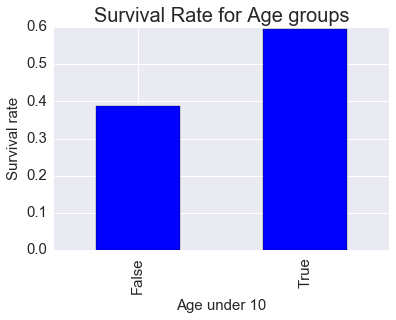

In [30]:
age_groups_survival_rate.plot.bar(fontsize =15)
plt.xlabel("Age under 10", fontsize = 15)
plt.ylabel("Survival rate", fontsize = 15)
plt.title("Survival Rate for Age groups", fontsize =20)

### The survival rate for children under 10 years old was about 1.5 times of the rate for people above 10.

### Based on the analysis, young children had a higher survival rate. Furturemore, is the average age of survivors significantly different from that of non-survivors?

In [31]:
survival_groups.describe()

Survived      Pclass         Age       SibSp       Parch  \
Survived                                                                   
0        count       424  424.000000  424.000000  424.000000  424.000000   
         mean          0    2.485849   30.626179    0.525943    0.365566   
         std           0    0.743633   14.172110    1.044760    0.878341   
         min           0    1.000000    1.000000    0.000000    0.000000   
         25%           0    2.000000   21.000000    0.000000    0.000000   
         50%           0    3.000000   28.000000    0.000000    0.000000   
         75%           0    3.000000   39.000000    1.000000    0.000000   
         max           0    3.000000   74.000000    5.000000    6.000000   
1        count       290  290.000000  290.000000  290.000000  290.000000   
         mean          1    1.872414   28.343690    0.493103    0.527586   
         std           0    0.836617   14.950952    0.731132    0.807147   
         min           1    1.000000    0.420000    0.000000    0.000000   
         25%           1    1.000000   19.000000    0.000000    0.000000   
         50%           1    2.000000   28.000000    0.000000    0.000000   
         75%           1    3.000000   36.000000    1.000000    1.000000   
         max           1    3.000000   80.000000    4.000000    5.000000   

                      Fare    Gender Age_under_10  
Survived                                           
0        count  424.000000       424          424  
         mean    22.965456  0.849057    0.0613208  
         std     31.448825  0.358417     0.240201  
         min      0.000000     False        False  
         25%      7.895800         1            0  
         50%     11.887500         1            0  
         75%     26.550000         1            0  
         max    263.000000      True         True  
1        count  290.000000       290          290  
         mean    51.843205   0.32069     0.131034  
         std     70.458776  0.467548     0.338021  
         min      0.000000     False        False  
         25%     13.000000         0            0  
         50%     26.250000         0            0  
         75%     66.200000         1            0  
         max    512.329200      True         True

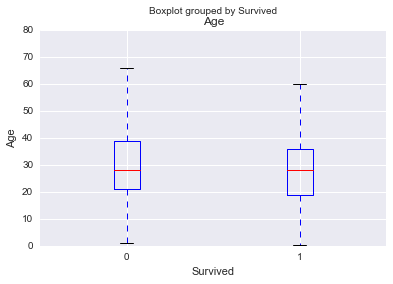

In [32]:
age_df.boxplot(column = "Age", by ="Survived")
plt.ylabel("Age")

### The descriptive analysis shows that the average age of survivors was smaller than non-survivors. Is this difference significant? Assuming the age distribution is normal, Students' t-test can be used to test the significance.

In [33]:
# make two arrays of age in two groups, survivors vs non-survivors
survived_group = survival_groups.get_group(1)["Age"]
non_survived_group = survival_groups.get_group(0)["Age"]

### Import statistic analysis library and perform t test
### H0: mean age of survivor group is equal to mean age of non-survivor group
### Ha: mean age of survivor group is different from mean age of non-survivor group

In [34]:
from scipy import stats


In [35]:
t, p = stats.ttest_ind(survived_group, non_survived_group, equal_var = False) 
# t is the t statistic and p is the calculated probability in t test

In [36]:
print t, p

-2.04603010439 0.0411896516259


### t statistic value is negative, indicating that the survivor group has a mean age less than non-surivovor group. The p value is less than 5%, indicating that the difference between two means is significant. Since this is a two-tail test and the p value is less than 5%. If a one-tail test was performed, the significance will be even greater. Therefore we reject the null hypothesis and conclude that the mean age of survivors is significantly different from non-survivors. In this case, the surivor group mean age is significant smaller. 

## 3. Is socio-economic status related to survival rate?

In [37]:
pclass_groups = num_titanic_df.groupby("Pclass")
pclass_groups_survival_rate = pclass_groups.mean()["Survived"]
print pclass_groups_survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


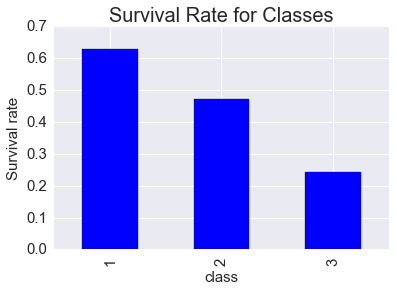

In [38]:
pclass_groups_survival_rate.plot.bar(fontsize = 15)
plt.title("Survival Rate for Classes", fontsize=20)
plt.xlabel("class", fontsize=15)
plt.ylabel("Survival rate", fontsize=15)

### From the above figure, we found that higher socio-economic class has a higher survival rate. The first socio-economic class survival rate is more than twice of the third socio-economic class.

# Conclusions: 
## Based on the analysis, I found that female has a higher survival rate than male. Children under 10 years old has a higher survival rate than the rest age group. The overall age of survivors is younger than non-survivors. In addition, socio-economic class also relates to the survival rate. Higher socio-economic class tends to have a higher survival rate. 

## Additional statistical analysis can further be performed to test the significant difference of the survival rate of different groups. In the analysis of age on survivor and non-survivor groups, I assumed the age distribution is normal. But actually, there are more children in the surivor group. Additional analysis needs to be done to achieve more accurate result. 

## Many factors contribute to survival rate. The difference that we observed in each group could be due to other factors. For example, since gender has an effect on the survival rate, the observed different on survival rate in socio-economic class may be attributed partially by gender. Therefore, in order to get a more accurate analysis, we should further divide the class within each gender group. Since children has a higher survival rate, we should also consider the age composition in gender group during analysis, or we can separate children as a third group during gender analysis. 

